In [1]:
import numpy as np
import matplotlib.pyplot as plt

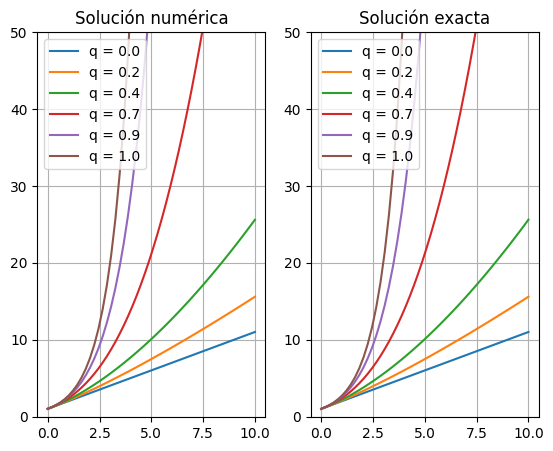

In [3]:
q_values = np.array([0., .2, .4, .7, .9, 1.])

def custom_function(y, q):
    return y ** q

def exact_solution(t, q):
    return (t * (1 - q) + 1) ** (1 / (1 - q))

def get_euler_approximation(f, x, q):
    dx = x[1] - x[0]
    y = np.zeros_like(x)
    y[0] = 1
    for i in range(1, len(x)):
        k1 = f(y[i - 1], q)
        k2 = f(y[i - 1] + k1 * dx, q)
        y[i] = y[i - 1] + 0.5 * (k1 + k2) * dx
    return y

fig_solution = plt.figure(figsize=(10, 5))
ax1 = fig_solution.add_subplot(131)
ax2 = fig_solution.add_subplot(132)

t_values = np.linspace(0, 10)
ax1.set_ylim(-0.1, 50)
ax2.set_ylim(-0.1, 50)
ax1.grid()
ax2.grid()

for index, q_value in enumerate(q_values):
    y_values = get_euler_approximation(custom_function, t_values, q_value)
    ax1.plot(t_values, y_values, label="q = %s" % (q_value))

    if not q_values[index] == 1:
        ax2.plot(t_values, exact_solution(t_values, q_values[index]), label="q = %s" % (q_value))
    else:
        ax2.plot(t_values, np.exp(t_values), label="q = %s" % (q_value))

ax1.set_title("Solución numérica")
ax2.set_title("Solución exacta")

ax1.legend()
ax2.legend()

plt.show()
